In [1]:
"""cho sẵn dữ liệu TwitterUSAirlineSentiment.csv bao gồm các cột.
airline_sentiment: Các mức độ phản hồi (positive, neutral, negative)
airline_sentiment_confidence: đô tin cậy của phản hồi
negativereason_confidence: độ tin cậy của lý do phủ định
airline: Hãng máy bay (Virgin America, United, Southwest, Delta, US Airways, American)
name: tên của hành khách phản hồi
text: phản hồi dạng chữ
user_timezone: múi giờ
Yêu cầu:
1.	(1 điểm) Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên
2.	(3 điểm) Tìm hiểu thông tin về dữ liệu:
a.	Số lượng phản hồi của mỗi hãng máy bay và số lượng phản hồi mỗi mức độ của từng hãng máy bay.
b.	Với mỗi mức độ phản hồi của từng hãng máy bay, hãy xác định các tham số thống kê: giá trị trung bình, độ lệch chuẩn của các thuộc tính đô tin cậy của phản hồi (airline_sentiment_confidence), độ tin cậy của lý do phủ định (negativereason_confidence); và độ đo xu hướng tập trung (central tendency) của thuộc tính múi giờ (user_timezone).
3.	 (3 điểm) Đồ thị hóa dữ liệu:
a.	Số lượng phản hồi của mỗi hãng máy bay bằng đồ thị tròn.
b.	Bằng đồ thị hộp râu (box plot) biểu diễn trực quan về cách dữ liệu của  thuộc tính đô tin cậy của phản hồi (airline_sentiment_confidence) theo hãng hàng không nằm rải rác trên mặt phẳng, so sánh giữa các mức độ phản hồi.
c.	Bằng đồ thị phù hợp biểu diễn sự tương quan bằng màu sắc giữa các thuộc tính dựa trên hệ số tương quan. 
4.	(3 điểm) Đường kính của một loại chi tiết do một máy sản xuất có phân phối chuẩn, kỳ vọng 20mm, độ lệch chuẩn 0,2mm). Lấy ngẫu nhiên 1 chi tiết máy. Tính xác suất để
a.	có đường kính nhỏ hơn 20,3mm
b.	có đường kính trong khoảng 19,9mm đến 20,3mm,
c.	có đường kính sai khác với kỳ vọng không quá 0,3mm
hãy code python"""

'cho sẵn dữ liệu TwitterUSAirlineSentiment.csv bao gồm các cột.\nairline_sentiment: Các mức độ phản hồi (positive, neutral, negative)\nairline_sentiment_confidence: đô tin cậy của phản hồi\nnegativereason_confidence: độ tin cậy của lý do phủ định\nairline: Hãng máy bay (Virgin America, United, Southwest, Delta, US Airways, American)\nname: tên của hành khách phản hồi\ntext: phản hồi dạng chữ\nuser_timezone: múi giờ\nYêu cầu:\n1.\t(1 điểm) Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên\n2.\t(3 điểm) Tìm hiểu thông tin về dữ liệu:\na.\tSố lượng phản hồi của mỗi hãng máy bay và số lượng phản hồi mỗi mức độ của từng hãng máy bay.\nb.\tVới mỗi mức độ phản hồi của từng hãng máy bay, hãy xác định các tham số thống kê: giá trị trung bình, độ lệch chuẩn của các thuộc tính đô tin cậy của phản hồi (airline_sentiment_confidence), độ tin cậy của lý do phủ định (negativereason_confidence); và độ đo xu hướng tập trung (central tendency) của thuộc tính múi giờ (user_timezone).\n3.\t (3 điểm) Đồ thị 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# 1 Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [14]:
df = df[['airline_sentiment', 'airline_sentiment_confidence', 'negativereason_confidence', 'airline', 'name', 'text', 'user_timezone']]
df.head(10)

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,airline,name,text,user_timezone
0,neutral,1.0000,NaN,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,Eastern Time (US & Canada)
1,positive,0.3486,0.0000,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,Central Time (US & Canada)
3,negative,1.0000,0.7033,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,Pacific Time (US & Canada)
4,negative,1.0000,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,Pacific Time (US & Canada)
5,negative,1.0000,0.6842,Virgin America,jnardino,@VirginAmerica seriously would pay $30 a fligh...,Pacific Time (US & Canada)
6,positive,0.6745,0.0000,Virgin America,cjmcginnis,"@VirginAmerica yes, nearly every time I fly VX...",Pacific Time (US & Canada)
7,neutral,0.6340,NaN,Virgin America,pilot,@VirginAmerica Really missed a prime opportuni...,Pacific Time (US & Canada)
8,positive,0.6559,NaN,Virgin America,dhepburn,"@virginamerica Well, I didn't…but NOW I DO! :-D",Pacific Time (US & Canada)
9,positive,1.0000,NaN,Virgin America,YupitsTate,"@VirginAmerica it was amazing, and arrived an ...",Eastern Time (US & Canada)


In [16]:
# 2. Tìm hiểu thông tin về dữ liệu:
# 2a. Số lượng phản hồi của mỗi hãng máy bay và số lượng phản hồi mỗi mức độ của từng hãng máy bay.
airline_counts = df['airline'].value_counts()
print("\nSố lượng phản hồi của mỗi hãng máy bay:")
print(airline_counts)

airline_sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().reset_index(name='counts')
print("\nSố lượng phản hồi mỗi mức độ của từng hãng máy bay:")
print(airline_sentiment_counts)


Số lượng phản hồi của mỗi hãng máy bay:
airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

Số lượng phản hồi mỗi mức độ của từng hãng máy bay:
           airline airline_sentiment  counts
0         American          negative    1960
1         American           neutral     463
2         American          positive     336
3            Delta          negative     955
4            Delta           neutral     723
5            Delta          positive     544
6        Southwest          negative    1186
7        Southwest           neutral     664
8        Southwest          positive     570
9       US Airways          negative    2263
10      US Airways           neutral     381
11      US Airways          positive     269
12          United          negative    2633
13          United           neutral     697
14          United          positive     492
15  Virgin Ame

In [17]:
# 2b. Với mỗi mức độ phản hồi của từng hãng máy bay, hãy xác định các tham số thống kê: giá trị trung bình, độ lệch chuẩn của các thuộc tính đô tin cậy của phản hồi (airline_sentiment_confidence), độ tin cậy của lý do phủ định (negativereason_confidence); và độ đo xu hướng tập trung (central tendency) của thuộc tính múi giờ (user_timezone).
confidence_stats = df.groupby(['airline', 'airline_sentiment']).agg({
    'airline_sentiment_confidence': ['mean', 'std'],
    'negativereason_confidence': ['mean', 'std']
}).reset_index()
print("\nThống kê các tham số:")
print(confidence_stats)

# Độ đo xu hướng tập trung (central tendency) của 'user_timezone'
timezone_central_tendency = df['user_timezone'].mode()[0]
print(f"\nĐộ đo xu hướng tập trung của thuộc tính 'user_timezone': {timezone_central_tendency}")


Thống kê các tham số:
           airline airline_sentiment airline_sentiment_confidence            \
                                                             mean       std   
0         American          negative                     0.944955  0.124992   
1         American           neutral                     0.825938  0.186387   
2         American          positive                     0.882302  0.169425   
3            Delta          negative                     0.902202  0.162831   
4            Delta           neutral                     0.829264  0.185266   
5            Delta          positive                     0.867111  0.177139   
6        Southwest          negative                     0.920533  0.147741   
7        Southwest           neutral                     0.826109  0.186759   
8        Southwest          positive                     0.886105  0.173846   
9       US Airways          negative                     0.945714  0.126575   
10      US Airways           

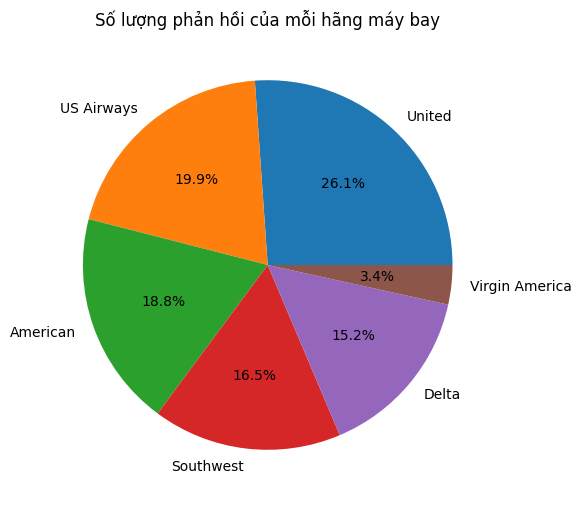

In [20]:
# 3 Đồ thị hóa dữ liệu:
# 3a. Số lượng phản hồi của mỗi hãng máy bay bằng đồ thị tròn.
plt.figure(figsize=(10, 6))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%')
plt.title('Số lượng phản hồi của mỗi hãng máy bay')
plt.show()

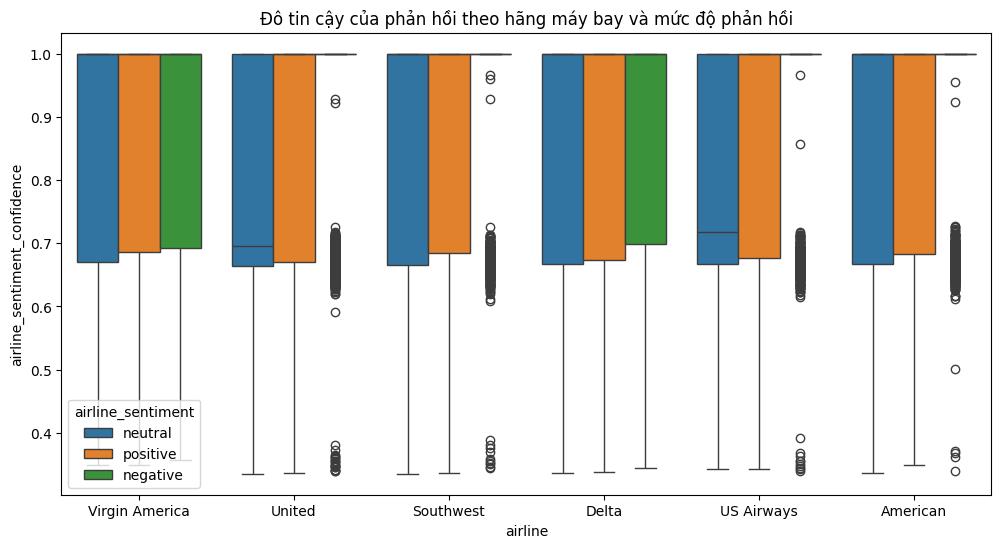

In [21]:
# 3b. Bằng đồ thị hộp râu (box plot) biểu diễn trực quan về cách dữ liệu của thuộc tính đô tin cậy của phản hồi (airline_sentiment_confidence) theo hãng hàng không nằm rải rác trên mặt phẳng, so sánh giữa các mức độ phản hồi.
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='airline_sentiment_confidence', hue='airline_sentiment', data=df)
plt.title('Đô tin cậy của phản hồi theo hãng máy bay và mức độ phản hồi')
plt.show()

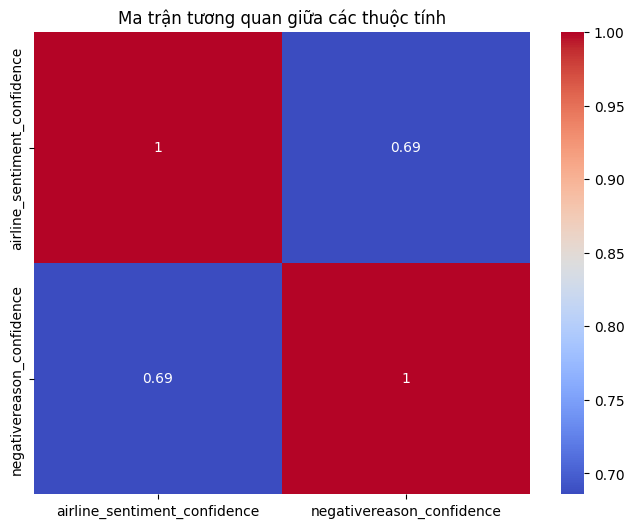

In [24]:
# 3c. Bằng đồ thị phù hợp biểu diễn sự tương quan bằng màu sắc giữa các thuộc tính dựa trên hệ số tương quan.
correlation_matrix = df[['airline_sentiment_confidence', 'negativereason_confidence']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

In [33]:
# 4. Đường kính của một loại chi tiết do một máy sản xuất có phân phối chuẩn, kỳ vọng 20mm, độ lệch chuẩn 0,2mm). Lấy ngẫu nhiên 1 chi tiết máy. Tính xác suất để
mean = 20  # Kỳ vọng
std_dev = 0.2  # Độ lệch chuẩn

# a. Xác suất có đường kính nhỏ hơn 20,3mm
prob_less_20_3 = stats.norm.cdf(20.3, mean, std_dev)
print(f"\nXác suất để đường kính nhỏ hơn 20,3mm: {prob_less_20_3:.4f}")


Xác suất để đường kính nhỏ hơn 20,3mm: 0.9332


In [34]:
# 4b. Xác suất có đường kính trong khoảng 19,9mm đến 20,3mm
prob_between_19_9_and_20_3 = stats.norm.cdf(20.3, mean, std_dev) - stats.norm.cdf(19.9, mean, std_dev)
print(f"Xác suất để đường kính trong khoảng 19,9mm đến 20,3mm: {prob_between_19_9_and_20_3:.4f}")

Xác suất để đường kính trong khoảng 19,9mm đến 20,3mm: 0.6247


In [35]:
# 4c. Xác suất có đường kính sai khác với kỳ vọng không quá 0,3mm
prob_within_0_3 = stats.norm.cdf(20.3, mean, std_dev) - stats.norm.cdf(19.7, mean, std_dev)
print(f"Xác suất để đường kính sai khác với kỳ vọng không quá 0,3mm: {prob_within_0_3:.4f}")

Xác suất để đường kính sai khác với kỳ vọng không quá 0,3mm: 0.8664
